# Homework 11

Student's Name: PLEASE INSERT YOUR NAME HERE

__Directions:__ Add work to this notebook to solve the problems below. Some other cells have been included which are important for testing your work and should give you some feeback.

Check your work.

**Your notebook should run without printing errors and without user input. If this is not the case, points may be deducted from your grade.**

Problem Sources:
* __LL__: *Programming for Computations - Python* by Svein Linge and Hans Petter Langtangen, 2nd edition.
* __L__: *A Primer on Scientific Programming with Python* by Hans Petter Langtangen, 2nd edition.
* __TAK__: *Applied Scientific Computing With Python* by Peter R. Turner, Thomas Arildsen, and Kathleen Kavanagh.

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpmath import mp, iv
from scipy import linalg

from numpy import random

import random as random_number

## 1. Random points in the circle

There are various coordinate schemes for points in the unit disk. You have learned about polar coordinates, which is governed by the map
$$P(r, \theta) = (r \cos \theta, r \sin \theta).$$
The image of the rectangle
$$\{(r,\theta):~0 \leq r \leq 1 \quad \text{and} \quad 0 \leq \theta \leq 2 \pi\}$$
under $P$ is the unit disk in the plane. However $r$ uniformly at random in $[0, 1]$ and $\theta$ uniformly at random in $[0, 2 \pi]$, then the corresponding distribution on points in the unit disk is not uniform: Points tend to cluster near the origin, as illustrated below.


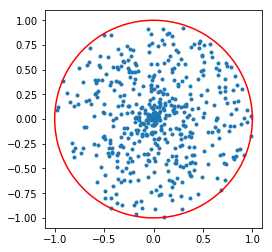

In [2]:
num_points = 500
r = random.random_sample(num_points)
theta = 2 * np.pi * random.random_sample(num_points)
plt.axes().set_aspect(1)
plt.plot(r * np.cos(theta), r * np.sin(theta), ".")
circle_param = np.linspace(0, 2*np.pi, 200)
plt.plot(np.cos(circle_param), np.sin(circle_param), "r")
plt.show()

The reason for this non-uniformity is that the [Jacobian determinant](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) is non-constant. As a review: the Jacobian is the matrix of partial derivatives. For $P$, the coordinate functions are $x=r \cos \theta$ and $y = r \sin \theta$. The Jacobian is the matrix 
$$\left(\begin{matrix} 
\frac{\partial x}{\partial r} & \frac{\partial x}{\partial \theta} \\
\frac{\partial y}{\partial r} & \frac{\partial y}{\partial \theta}
\end{matrix}\right),$$
and its determinant is $r$, which shows up in the Polar coordinates formula for integration, $dA = r~dr~d\theta.$

A simple modification of the polar coordinates formula fixes this. Define
$$F(u, \theta) = (\sqrt{u} \cos \theta, \sqrt{u} \sin \theta).$$
Then the determinant of the Jacobian is the constant $\frac{1}{2}$. The unit disk is the image of the rectangle
$$R = \{(u,\theta):~0 \leq u \leq 1 \quad \text{and} \quad 0 \leq \theta \leq 2 \pi\}$$
under $F$. This means that a uniformly random point in the circle can be determined by choosing a point $(u, \theta)$ in the rectangle $R$ uniformly at random and then taking the image of this point under $F$.

**Problem.** Write a function `random_point_in_disk()` which takes no input and returns a point uniformly at random in the unit disk. The returned points should numpy arrays with two elements, e.g., `np.array([x,y])`.

To check your answer, you can modify the above code it plot $500$ random points returned by your function. The plotted points should look more uniform then the above points.

## 2. Monte Carlo Integration in the disk

Write a function `integrate(f, n)` which takes as input a function `f` and a positive integer `n`. The function `f(x,y)` should take two floating point real numbers as inputs and return a floating point real number.

The function `integrate(f, n)` should return an estimate for the integral of $f$ over the unit disk, 
$$\int_D f(x,y)~dA.$$
The estimate should be obtained using Monte Carlo Integration using $n$ points taken uniformly from the unit disk. You can make use of the `random_point_in_disk()` function written for problem 1.

In [6]:
# Test estimate for the volume of the unit sphere in R^3
# If programmed correctly, this should almost always work.
def f(x, y):
    return 2 * np.sqrt(1 - x**2 - y**2)

error = abs(integrate(f, 10000) - 4/3*np.pi)

print("The absolute error in your estimate is {:0.5f}".format(error))

if error < 0.05:
    print("Great! Your answer is reasonable.")
else:
    print("Oops. The integral estimate seems to have way to much error.")

The absolute error in your estimate is 0.00678
Great! Your answer is reasonable.


## 3. Estimating Areas

Suppose $f:D \to \{\mathbb R\}$ is a function sending points in unit disk $D$ to the real numbers. Then $D$ determines a region $R_f$ contained in the unit disk:
$$R_f = \{(x,y) \in D:~f(x,y) \leq 0.\}$$

Write a function `Area(f, n)` which uses Monte Carlo integration to estimate the area of $R_f$ using $n$ points in the unit disk $D$. As in the previous problem, `f(x,y)` should be a function taking two floating point real numbers as inputs and should return a floating point real number. The number $n$ should be a positive integer.

The region $R_f$ associated to the function
$$f(x,y)=|x|+|y|-1$$
is the square whose verices are $(\pm 1,0)$ and $(0, \pm 1)$. This square has area $2$. 
Here is a related test:

In [8]:
# If programmed correctly, this should almost always work.
def f(x, y):
    return np.abs(x) + np.abs(y) - 1

error = abs(area(f, 10000) - 2)

print("The absolute error in your estimate is {:0.6f}".format(error))

if error < 0.02:
    print("Great! Your answer is reasonable.")
else:
    print("Oops. The integral estimate seems to have way to much error.")

The absolute error in your estimate is 0.015646
Great! Your answer is reasonable.
